In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

df = pd.read_csv('./uploads/tomi.csv',
                 skiprows=0,
                 delimiter=';')

profundidade = df["Profundidade"]
ID = df["ID"]
TN_perc = df["TN%"]
d15N = df["d15N"]
TOC_perc = df["TOC%"]
d13C = df["d13C"]
TOC_TN = df["TOC/TN"]

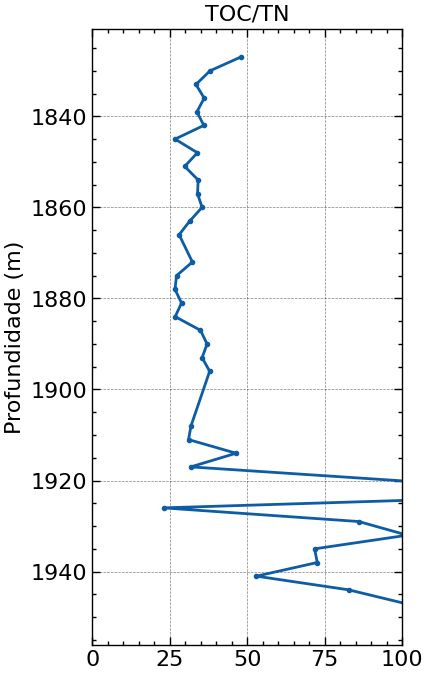

In [5]:
plt.figure(figsize=(4, 8))

plt.plot(TOC_TN, profundidade, '.-',label='TOC/TN')
plt.title('TOC/TN')
plt.ylabel('Profundidade (m)')
plt.xlim(0, 100)
plt.gca().invert_yaxis()

In [12]:
# do artigo
art_toc_tn = np.array([4,4,4,4,10,10,10,10,100,100,100,100])
art_c13corg = np.array([-10,-22,-25,-34,-10,-22,-25,-34,-10,-22,-25,-34])
art_tomi_index_prob = np.array([0,10,20,30,20,30,40,50,90,95,98,100])

In [68]:
import numpy as np
from pykrige.ok import OrdinaryKriging

# Dados dos pontos-chave de probabilidade
art_toc_tn = np.array([4,4,4,4,10,10,10,10,100,100,100,100])  # Lista/array dos valores de TOC:TN dos pontos-chave
art_c13corg = np.array([-10,-22,-25,-34,-10,-22,-25,-34,-10,-22,-25,-34])  # Lista/array dos valores de δ13Corg dos pontos-chave
probabilidade = np.array([0,10,20,30,20,30,40,50,90,95,98,100])  # Lista/array dos valores de probabilidade dos pontos-chave

# Dados das suas amostras
amostra_art_toc_tn = TOC_TN  # Lista/array dos valores de TOC:TN das suas amostras
amostra_art_c13corg = d13C  # Lista/array dos valores de δ13Corg das suas amostras

# Grade de valores para interpolação
art_toc_tn_grid = np.linspace(0, 100, 1001)  # Valores de TOC:TN para a grade
art_c13corg_grid = np.linspace(-34, -10, 241)  # Valores de δ13Corg para a grade

# Kriging
OK = OrdinaryKriging(art_toc_tn, art_c13corg, probabilidade, variogram_model='gaussian')
z, ss = OK.execute('grid', art_toc_tn_grid, art_c13corg_grid)

# Aplicação dos dados das suas amostras na grade interpolada
amostra_probabilidade, ss = OK.execute('points', amostra_art_toc_tn, amostra_art_c13corg)

print(np.shape(z))
print(np.shape(amostra_probabilidade))

(241, 1001)
(37,)


In [69]:
print(amostra_probabilidade)

[99.9258391111712 90.59304484003044 84.16254880683297 88.38161088821553
 85.12109497031219 88.23795745109436 73.26793697883471 85.26683966391604
 79.05111652711948 85.58536952753373 84.7571114833828 83.6473022673136
 79.30625471472419 73.47620957236528 80.19980098379143 73.6482493754987
 73.46375252381794 77.69934429505457 73.5453363827044 87.05602579200558
 88.53416013236841 87.76390964025961 91.15499018737177 81.70164855739178
 80.68136266581314 94.39804803045534 81.90802221517058 63.91507067277759
 63.29714810634077 103.09990308653249 97.26061564005668 106.32189661882117
 106.3386144399606 104.28901513410577 104.05195415233365 97.52702319841671
 89.514834865138]


(0.0, 100.0)

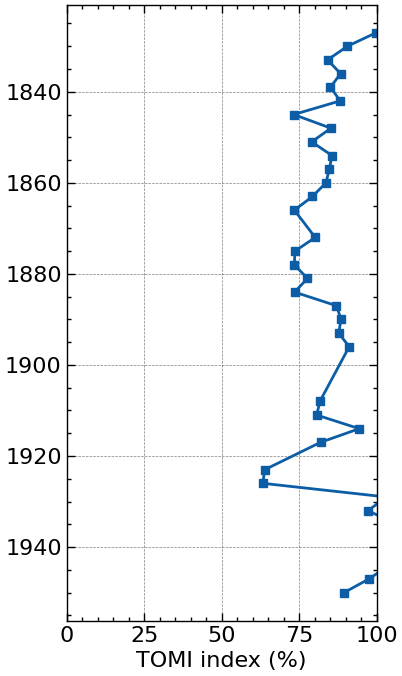

In [70]:
plt.figure(figsize=(4,8))

plt.plot(amostra_probabilidade,profundidade, 's-',label='TOMI')
plt.gca().invert_yaxis()
plt.xlabel("TOMI index (%)")
plt.xlim(0,100)

In [36]:
import numpy as np
from pykrige.ok import OrdinaryKriging

# Assuming TOC_TN and d13Corg are numpy arrays containing your data
TOC_TN = df["TOC/TN"].values
d13C = df["d13C"].values

# Define the grid
TOC_TN_grid = np.linspace(0, 100, 1001)
d13Corg_grid = np.linspace(-34, -10, 241)

# Perform ordinary kriging
OK = OrdinaryKriging(TOC_TN, d13C, np.zeros_like(TOC_TN), variogram_model='linear')
z, ss = OK.execute('grid', TOC_TN_grid, d13Corg_grid)

# z is the kriged grid

ValueError: Each lower bound must be strictly less than each upper bound.

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the kriged grid
c = ax.imshow(z, origin="lower", extent=[TOC_TN_grid.min(), TOC_TN_grid.max(), d13Corg_grid.min(), d13Corg_grid.max()])

# Add a colorbar
fig.colorbar(c, ax=ax)

# Set the labels
ax.set_xlabel("TOC/TN")
ax.set_ylabel("d13Corg")

# Show the plot
plt.show()